In [327]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ElectionLib
import geopandas as gpd
from shapely.geometry import Point
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [328]:
def mapScore(party):

    twi_data=ElectionLib.exportDataTwitter('en',party[0])
    red_data=ElectionLib.exportDataReddit(party[0])

    states=[
    'Andaman and Nicobar Islands',
    'Andhra Pradesh'
    'Arunachal Pradesh',
    'Assam',
    'Bihar',
    'Chandigarh',
    'Chhattisgarh',
    'Dadra and Nagar Haveli',
    'Daman and Diu',
    'Goa',
    'Gujarat',
    'Haryana',
    'Himachal Pradesh',
    'Jharkhand',
    'Karnataka',
    'Kerala',
    'Lakshadweep',
    'Madhya Pradesh',
    'Maharashtra',
    'Manipur',
    'Meghalaya',
    'Mizoram',
    'Nagaland',
    'Delhi',
    'Puducherry',
    'Punjab',
    'Rajasthan',
    'Sikkim',
    'Tamil Nadu',
    'West Bengal',
    'Telangana',
    'Tripura',
    'Uttar Pradesh',
    'Uttarakhand',
    'Odisha',
    'Jammu and Kashmir',
    'Ladakh'
    ]
    state_score={}
    for state in states:
        state_score[state]=None

    #print(state_score)
    analyzer = SentimentIntensityAnalyzer()
    for post in twi_data+red_data:
        for state in states:
            #print(state,post)
            if re.search(state.lower(),post):
                sentiment_dict = analyzer.polarity_scores(post)
                if state_score[state] == None:
                    state_score[state]=sentiment_dict['compound']
                else:
                    state_score[state]+=sentiment_dict['compound']/2


    file=open(party+'.csv','w')
    file.write('State,Score\n')
    for key,value in state_score.items():
        if value == None:
            continue
        file.write(key+','+str(value)+'\n')

    print(state_score)

In [329]:
def displayMap(party):
    df = pd.read_csv(party+'.csv')
    pd.set_option('display.max_columns', None)
    df.head()

    fp = r'Maps_with_python\india-polygon.shp'
    map_df = gpd.read_file(fp)                          # Reads the shape file of India for plotting purpose
    map_df_copy = gpd.read_file(fp)
    map_df.head()

    merged = map_df.set_index('st_nm').join(df.set_index('State'))
    #merged['Score'] = merged['Score'].replace(np.nan, 0)
    merged.head()

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.axis('off')
    ax.set_title('Sentiment Score for '+party.upper(), fontdict={'fontsize': '20', 'fontweight' : '10'})

    # Plot the figure
    color='YlOrRd'
    if party == 'inc':
        color = 'YlGnBu'
    merged.boundary.plot(ax=ax, color='Black', linewidth=.8)
    merged.plot(column='Score',cmap=color, linewidth=0, ax=ax, edgecolor='0', \
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Sentiment Score"})

In [330]:
mapScore('bjp')

{'Andaman and Nicobar Islands': None, 'Andhra PradeshArunachal Pradesh': None, 'Assam': 1.3718000000000001, 'Bihar': 0.8176, 'Chandigarh': -0.3818, 'Chhattisgarh': 0.003599999999999992, 'Dadra and Nagar Haveli': None, 'Daman and Diu': None, 'Goa': 1.5998, 'Gujarat': 0.4388000000000001, 'Haryana': 0.629, 'Himachal Pradesh': 0.629, 'Jharkhand': 1.03945, 'Karnataka': -2.6193500000000003, 'Kerala': 0.3475499999999999, 'Lakshadweep': None, 'Madhya Pradesh': -2.3737000000000004, 'Maharashtra': 1.1099999999999999, 'Manipur': 1.99525, 'Meghalaya': None, 'Mizoram': None, 'Nagaland': None, 'Delhi': 0.3290999999999999, 'Puducherry': None, 'Punjab': 0.34725000000000017, 'Rajasthan': -0.58705, 'Sikkim': None, 'Tamil Nadu': 1.1568999999999998, 'West Bengal': 0.7930499999999999, 'Telangana': 0.39449999999999996, 'Tripura': 0.67555, 'Uttar Pradesh': 2.12625, 'Uttarakhand': 0.9925999999999999, 'Odisha': None, 'Jammu and Kashmir': -0.6154, 'Ladakh': None}


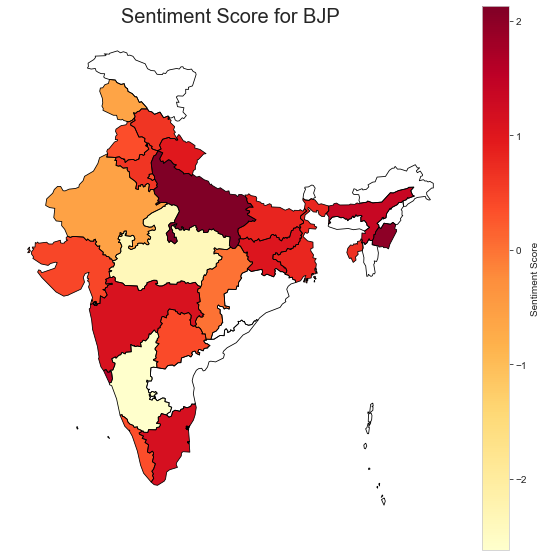

In [331]:
displayMap('bjp')

In [332]:
mapScore('inc')

{'Andaman and Nicobar Islands': None, 'Andhra PradeshArunachal Pradesh': None, 'Assam': 0.29090000000000005, 'Bihar': -0.27375, 'Chandigarh': 0.0, 'Chhattisgarh': 0.995, 'Dadra and Nagar Haveli': None, 'Daman and Diu': None, 'Goa': 1.554, 'Gujarat': 2.69095, 'Haryana': -0.4767, 'Himachal Pradesh': None, 'Jharkhand': None, 'Karnataka': 2.8579000000000003, 'Kerala': 2.8445, 'Lakshadweep': None, 'Madhya Pradesh': 0.6616500000000001, 'Maharashtra': -0.8293000000000001, 'Manipur': 0.6058000000000001, 'Meghalaya': None, 'Mizoram': None, 'Nagaland': None, 'Delhi': 3.0729500000000005, 'Puducherry': 0.995, 'Punjab': 3.3683500000000004, 'Rajasthan': 1.5011999999999999, 'Sikkim': None, 'Tamil Nadu': 0.9693499999999999, 'West Bengal': 1.65, 'Telangana': -2.1940999999999997, 'Tripura': -0.8316, 'Uttar Pradesh': 0.9183999999999999, 'Uttarakhand': 0.064, 'Odisha': 1.49985, 'Jammu and Kashmir': None, 'Ladakh': None}


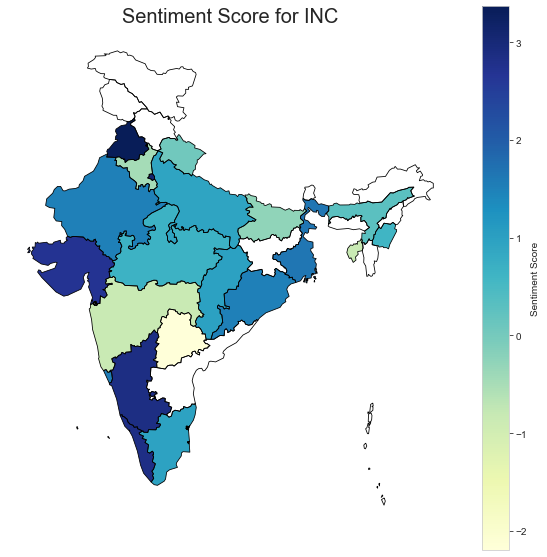

In [333]:
displayMap('inc')